Customer Segmentaion

Loading packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

Loading Data

In [3]:
df=pd.read_csv('walmart.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


Basic analysis on dataset

Checking Null values

In [4]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

Demographics of data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


Grouping clustering

In [11]:
FM_analysis=df.groupby('User_ID').agg(Frequency=('Product_ID','count'),
                                       Monetary=('Purchase','sum')).reset_index()

In [12]:
FM_analysis.head()

,User_ID,Frequency,Monetary
0,1000001,35,334093
1,1000002,77,810472
2,1000003,29,341635
3,1000004,14,206468
4,1000005,106,821001


Applying log for avoiding scewed values

In [13]:
FM_analysis['Frequency_log']=np.log1p(FM_analysis['Frequency'])
FM_analysis['Monetary_log']=np.log1p(FM_analysis['Monetary'])

Scaling for normalising and further application

In [14]:
scale=StandardScaler()
FM_analysis[['Frequency_log','Monetary_log']]=scale.fit_transform(FM_analysis[['Frequency_log','Monetary_log']])

In [15]:
features=FM_analysis[['Frequency_log','Monetary_log']]

Finding the optimal k value

In [17]:
inertia=[]
sil_score=[]
k_range=range(2,11)
for k in k_range:
    kmeans=KMeans(n_clusters=k,random_state=42,n_init=10)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)
    sil_score.append(silhouette_score(features,kmeans.labels_))


Elbow method

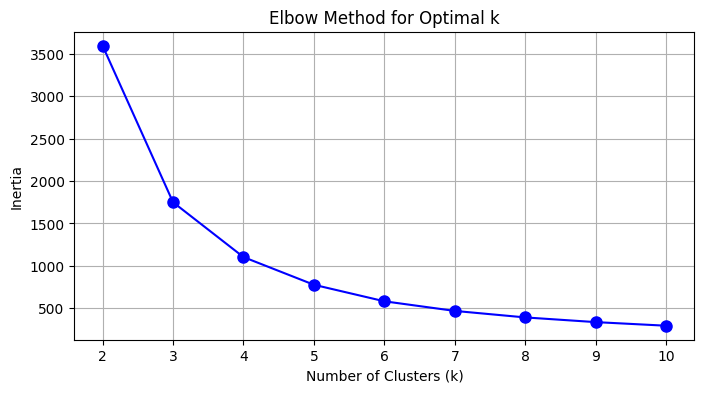

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
#
# plt.close()
plt.show()


In [ ]:
plt.savefig('elbow_plot.png')

<Figure size 640x480 with 0 Axes>

Silhouette score method

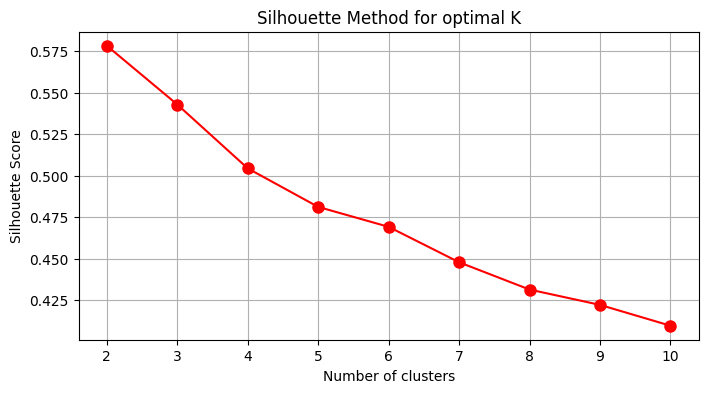

In [36]:
plt.figure(figsize=(8,4))
plt.plot(k_range,sil_score,'ro-',markersize=8)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title("Silhouette Method for optimal K")
plt.grid(True)
plt.show()

In [22]:
plt.savefig('silhouetter_plot.png')

<Figure size 640x480 with 0 Axes>

Interpretation:
(1).From elbow method we can observe there is a signifcant fall in cluster 3 and starts flattening
(2).From Silhouette score significant shift from cluster 3 to 4
(3).in silhouette also the closter 4 shows a score of 0.5 approx which means there's a mid type clustering and still we have some overlaps.

Predicting the main clusters(optimal cluster)

In [24]:
k=3  # Assuming k=3 is chosen based on the elbow and silhouette method
kmeans=KMeans(n_clusters=k,random_state=42,n_init=10)
FM_analysis['Clusters']=kmeans.fit_predict(features)

In [26]:
FM_analysis['Clusters'].value_counts()

Clusters
0    2267
2    2156
1    1468
Name: count, dtype: int64

Summarising the cluster

In [27]:
summary_segmentation=FM_analysis.groupby('Clusters').agg({
    'Frequency':['mean','min','max','count'],
    'Monetary':['mean','min','max']
}).round(2)
summary_segmentation.columns=[['Frequency Mean','Frequency Min','Frequency Max','Count of users in cluster','Monetary Mean','Monetary Min','Monetary Max']]
summary_segmentation.reset_index()


,Clusters,Frequency Mean,Frequency Min,Frequency Max,Count of users in cluster,Monetary Mean,Monetary Min,Monetary Max
0,0,67.70,29,146,2267,657581.34,262249,1324366
1,1,238.27,94,1026,1468,2158952.83,872625,10536909
2,2,21.71,6,51,2156,202102.54,46681,434200


In [28]:
summary_segmentation.to_csv('summary_segmentation.csv',index=False)

Interpretaion:
(1) From the above data we can conclude that cluster 1 has the most hugly loya and high budegt customers(often buyers)
(2) Cluster 2 is least loyal and least budget customers(least buyers)
(3) Cluster 0 is of mid state customers(flowy customers)

Finding the demographics of the customers in each cluster

In [29]:
df_merged=df.merge(FM_analysis[['User_ID','Clusters']], on='User_ID', how='left')
profile_df=df_merged.groupby('Clusters').agg({
    'Age':lambda x:x.mode()[0],
    'Gender':lambda x:x.mode()[0],
    'City_Category':lambda x:x.mode()[0],
    'Marital_Status':lambda x:x.mode()[0],
    'Purchase': 'mean'
}).round(2).reset_index()

In [30]:
profile_df.head()

,Clusters,Age,Gender,City_Category,Marital_Status,Purchase
0,0,26-35,M,C,0,9712.72
1,1,26-35,M,B,0,9060.93
2,2,26-35,M,C,0,9309.74


Final depiction of cluster analysis

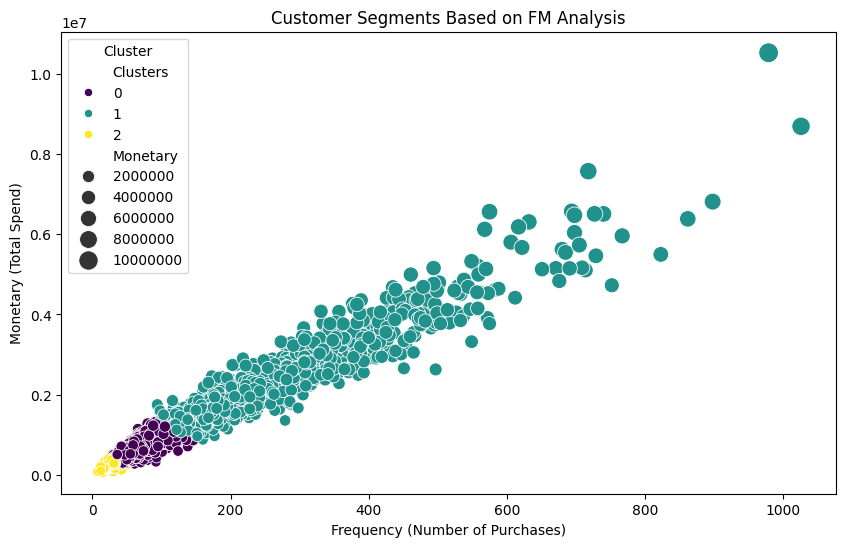

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=FM_analysis, x='Frequency', y='Monetary', hue='Clusters', 
                palette='viridis', size='Monetary', sizes=(50, 200))
plt.xlabel('Frequency (Number of Purchases)')
plt.ylabel('Monetary (Total Spend)')
plt.title('Customer Segments Based on FM Analysis')
plt.legend(title='Cluster')

# plt.close()
plt.show()

In [34]:
plt.savefig('segment_scatter.png')

<Figure size 640x480 with 0 Axes>

In [35]:
print('Segmentation Summary:')
print(summary_segmentation)
print('Demographic Profile of Segments:')
print(profile_df)

Segmentation Summary:
         Frequency Mean Frequency Min Frequency Max Count of users in cluster  \
Clusters                                                                        
0                 67.70            29           146                      2267   
1                238.27            94          1026                      1468   
2                 21.71             6            51                      2156   

         Monetary Mean Monetary Min Monetary Max  
Clusters                                          
0            657581.34       262249      1324366  
1           2158952.83       872625     10536909  
2            202102.54        46681       434200  
Demographic Profile of Segments:
   Clusters    Age Gender City_Category  Marital_Status  Purchase
0         0  26-35      M             C               0   9712.72
1         1  26-35      M             B               0   9060.93
2         2  26-35      M             C               0   9309.74
